In [16]:
import numpy as np

B = np.array([[1,0],[0,1]])
C = np.array([[0.1,0.9],[0.8,0.2]])
A = np.kron(B, C)

In [47]:
m1 = 2
n1 = 2
m2 = 2
n2 = 2

def kron_inverse(A, m1, n1, m2, n2, threshold=1):
    m = m1*m2
    n = n1*n2
    C0 = np.ones([m2,n2]) / n2
    B0 = np.zeros([m1,n1])
    ep = 10
    t = 100
    while ep > threshold and t>0:
        gamma = np.trace(C0.T @ C0)
        for i in range(m1):
            for j in range(n1):
                Apq = A[i*m2:(i+1)*m2, j*n2:(j+1)*n2]
                B0[i,j] = np.trace(C0.T @ Apq) / gamma
        beta = np.trace(B0.T @ B0)
        for i in range(m2):
            for j in range(n2):
                Aqp = A[i:m:m2, j:n:n2]
                C0[i,j] = np.trace(B0.T @ Aqp) / beta
        eps = A - np.kron(B0,C0)
        ep = np.linalg.norm(eps, ord='fro')
        t -= 1
    return ep, B0, C0



In [48]:
B = np.array([[1,0,0],[0.3,0.6,0.1],[0.5,0,0.5]])
C = np.array([[0.1,0.9],[0.8,0.2]])
A = np.kron(B, C)
m1 = 3
n1 = 3
m2 = 2
n2 = 2
ep, B0, C0 = kron_inverse(A, m1, n1, m2, n2)
ep, B0, C0


(1.992139400657732e-16,
 array([[1. , 0. , 0. ],
        [0.3, 0.6, 0.1],
        [0.5, 0. , 0.5]]),
 array([[0.1, 0.9],
        [0.8, 0.2]]))

In [49]:
A = np.array([[1,0],[0,1],[0,1],[1,0]])
print(A)
ep, B0, C0 = kron_inverse(A, 2, 2, 2, 1)
ep, B0, C0

[[1 0]
 [0 1]
 [0 1]
 [1 0]]


(1.4142135623730951,
 array([[0.5, 0.5],
        [0.5, 0.5]]),
 array([[1.],
        [1.]]))

In [ ]:
A = np.array([[1,0],[0,1],[0,1],[1,0]])
print(A)
ep, B0, C0 = kron_inverse(A, 2, 2, 2, 1)
ep, B0, C0

In [9]:
m1 = 2
n1 = 2
m2 = 2
n2 = 2
RA = np.zeros([m1*n1, m2*n2])
for j in range(n1):
    for i in range(m1):
        Apq = A[i*m2:(i+1)*m2, j*n2:(j+1)*n2]
        Apq_vec = Apq.reshape(-1,1,order='F').T
        RA[(i+1)*(j+1)-1, :] = Apq_vec
RA

array([[0.1, 0.8, 0.9, 0.2],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0.1, 0.8, 0.9, 0.2]])

In [10]:
U, S, V = np.linalg.svd(RA, full_matrices=False)
U, S, V

(array([[-0.70710678, -0.70710678,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ],
        [-0.70710678,  0.70710678,  0.        ,  0.        ]]),
 array([1.73205081e+00, 9.69503446e-17, 0.00000000e+00, 0.00000000e+00]),
 array([[-8.16496581e-02, -6.53197265e-01, -7.34846923e-01,
         -1.63299316e-01],
        [-1.04366432e-01,  7.16965525e-01, -6.65537836e-01,
          1.79241381e-01],
        [ 0.00000000e+00, -2.42535625e-01, -1.59305178e-17,
          9.70142500e-01],
        [ 9.91181609e-01,  2.16850271e-02, -1.30611593e-01,
          5.42125678e-03]]))

In [12]:
B_vec = S[0]*U[:,0]
C_vec = V[:,0]
B = B_vec.reshape(m1,n1)
C = C_vec.reshape(m2,n2)
B, C

(array([[-1.22474487,  0.        ],
        [ 0.        , -1.22474487]]),
 array([[-0.08164966, -0.10436643],
        [ 0.        ,  0.99118161]]))

In [13]:
eps = A - np.kron(B,C)
ep = np.linalg.norm(eps, ord='fro')
ep

2.543815159710461

In [1]:
import numpy as np
from sklearn.cluster import KMeans

def cluster_data(data, n_clusters):
    """
    聚类函数
    :param data: 二维数组，每一行是一个数据点，每一列是一个特征
    :param n_clusters: 聚类的数量
    :return: 分组矩阵，每一行对应一个数据点的聚类标签
    """
    # 检查输入数据是否为二维数组
    if not isinstance(data, np.ndarray) or len(data.shape) != 2:
        raise ValueError("输入数据必须是二维数组！")
    
    # 检查聚类数量是否合理
    if n_clusters <= 0 or n_clusters > len(data):
        raise ValueError("聚类数量必须大于0且小于等于数据点数量！")
    
    # 使用K-Means算法进行聚类
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=2)
    kmeans.fit(data)
    
    # 获取每个数据点的聚类标签
    labels = kmeans.labels_
    
    # 将标签转换为分组矩阵
    # 分组矩阵的每一行对应一个数据点，值为1表示该数据点属于该聚类，否则为0
    group_matrix = np.zeros((len(data), n_clusters), dtype=int)
    for i, label in enumerate(labels):
        group_matrix[i, label] = 1
    
    return group_matrix


data = np.array([
    [1.0, 2.0],
    [1.5, 1.8],
    [5.0, 8.0],
    [8.0, 8.0],
    [1.0, 0.6],
    [9.0, 11.0],
    [8.0, 2.0],
    [10.0, 2.0],
    [9.0, 3.0]
])

# 聚类数量
n_clusters = 3

# 调用聚类函数
group_matrix = cluster_data(data, n_clusters)

# 打印结果
print("分组矩阵：")
print(group_matrix)


分组矩阵：
[[0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [3]:
def svd_decomposition(matrix):
    """
    对输入矩阵进行SVD分解，并输出特征向量（奇异向量）所组成的矩阵。
    :param matrix: 输入矩阵，形状为 (m, n)
    :return: 左奇异向量矩阵 U 和右奇异向量矩阵 V^T
    """
    # 检查输入矩阵是否为二维数组
    if not isinstance(matrix, np.ndarray) or len(matrix.shape) != 2:
        raise ValueError("输入必须是二维数组！")
    
    # 执行SVD分解
    U, S, VT = np.linalg.svd(matrix, full_matrices=True)
    
    return U[:,:2]

In [5]:
var_mat1 = np.array([[1, 0], [1, 0], [0, 1], [0, 1]])
var_mat2 = np.array([[1, 0], [0, 1], [1, 0], [0, 1]])

import numpy as np

def cosine_similarity(array1, array2):
    """
    计算两个一维数组的余弦相似度。
    :param array1: 第一个一维数组
    :param array2: 第二个一维数组
    :return: 余弦相似度值（介于 -1 和 1 之间）
    """
    # 检查输入是否为一维数组
    if not isinstance(array1, np.ndarray) or not isinstance(array2, np.ndarray):
        raise ValueError("输入必须是 NumPy 数组！")
    if len(array1.shape) != 1 or len(array2.shape) != 1:
        raise ValueError("输入必须是一维数组！")
    if len(array1) != len(array2):
        raise ValueError("两个数组的长度必须相同！")
    
    # 计算点积
    dot_product = np.dot(array1, array2)
    
    # 计算范数
    norm1 = np.linalg.norm(array1)
    norm2 = np.linalg.norm(array2)
    
    # 计算余弦相似度
    cosine_sim = dot_product / (norm1 * norm2)
    
    return np.abs(cosine_sim)

def sim_mat(mat1, mat2):
    sim_lss = []
    for i in range(mat1.shape[1]):
        sim_ls = []
        for j in range(mat2.shape[1]):
            sim = cosine_similarity(mat1[:,i], mat2[:,j])
            sim_ls.append(sim)
        sim_lss.append(np.max(sim_ls))
    return np.mean(sim_lss)
        

def distance(mat1, mat2):
    dis1 = np.abs(mat1 - mat2)
    dis2 = np.abs(mat1 - mat2[:,::-1])
    return np.min([np.mean(dis1), np.mean(dis2)])


In [21]:
import sys
sys.path.append("../../..")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
from func.iit_tpm import make_tpm, tpm_series, dis_mean
from func.grn_tpm import iit_tpm_cal

n = 7
a_ls = np.linspace(0,1,n)
b_ls = np.linspace(0,1,n)
c_ls = np.linspace(0,1,n)
d_ls = np.linspace(0,1,n)
n_clusters = 2
var_mat1 = np.array([[1, 0], [1, 0], [0, 1], [0, 1]])
var_mat2 = np.array([[1, 0], [0, 1], [1, 0], [0, 1]])
group_list = []
exp_ls = []
syn_ls = []
int_ls = []
dis_ls = []
for a in a_ls:
    for b in b_ls:
        for c in c_ls:
            for d in d_ls:
                tpm = np.array([[a, 1-a],[b, 1-b],[c,1-c],[d, 1-d]])
                #group_matrix = cluster_data(tpm, n_clusters)
                group_matrix = svd_decomposition(tpm)
                un_sys, un_en, syn, expansive, introverted, tpm_dic = iit_tpm_cal(tpm, mech_size=1, en_size=1, dis=True, new_item=False) 
                group_list.append(group_matrix)
                exp_ls.append(expansive)
                syn_ls.append(syn)
                int_ls.append(introverted)
                diss1 = sim_mat(group_matrix, var_mat1)
                diss2 = sim_mat(group_matrix, var_mat2)
                dis_ls.append(np.max([diss1, diss2]))
#                 if diss1 + diss2 == 1 and expansive == 0:
#                     print(tpm)


In [16]:
group_list = []
syn_ndeg_ls = []
syn_det_ls = []
syn_ls = []
dis_ls = []

for a in a_ls:
    for b in b_ls:
        for c in c_ls:
            for d in d_ls:
                tpm = np.array([[a, 1-a],[b, 1-b],[c,1-c],[d, 1-d]])
                #group_matrix = cluster_data(tpm, n_clusters)
                group_matrix = svd_decomposition(tpm)
                un_sys, un_en, syn, syn_ndeg, syn_det, tpm_dic = iit_tpm_cal(tpm, mech_size=1, en_size=1, dis=True, new_item=True) 
                group_list.append(group_matrix)
                syn_ndeg_ls.append(syn_ndeg)
                syn_ls.append(syn)
                syn_det_ls.append(syn_det)
#                 diss1 = distance(group_matrix, var_mat1)
#                 diss2 = distance(group_matrix, var_mat2)
                diss1 = sim_mat(group_matrix, var_mat1)
                diss2 = sim_mat(group_matrix, var_mat2)
                dis_ls.append(np.min([diss1, diss2]))
#                 if diss1**2 + diss2**2 < 0.51 and syn < 0.1:
#                     print(tpm)
#                     print('group:', group_matrix)


Text(0, 0.5, 'Int')

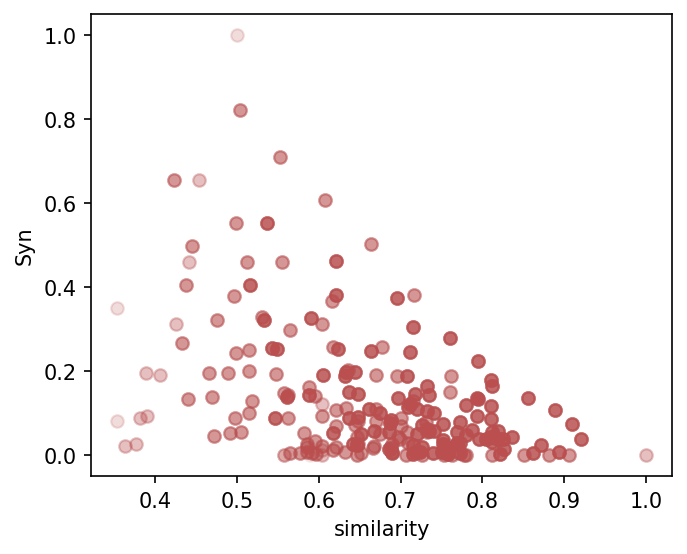

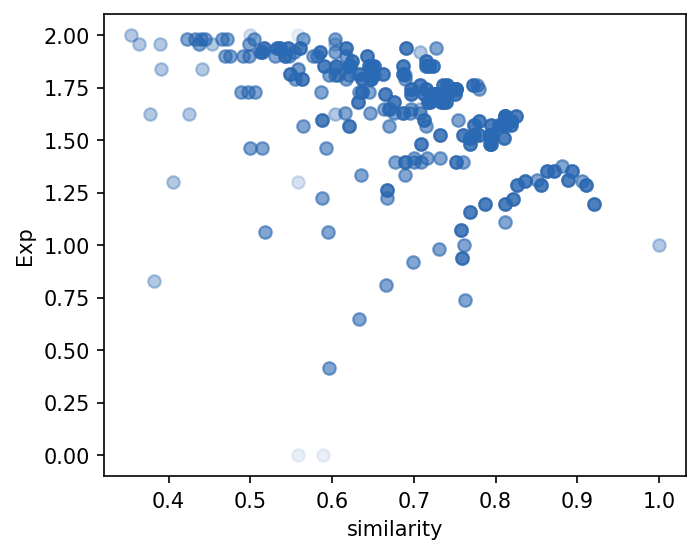

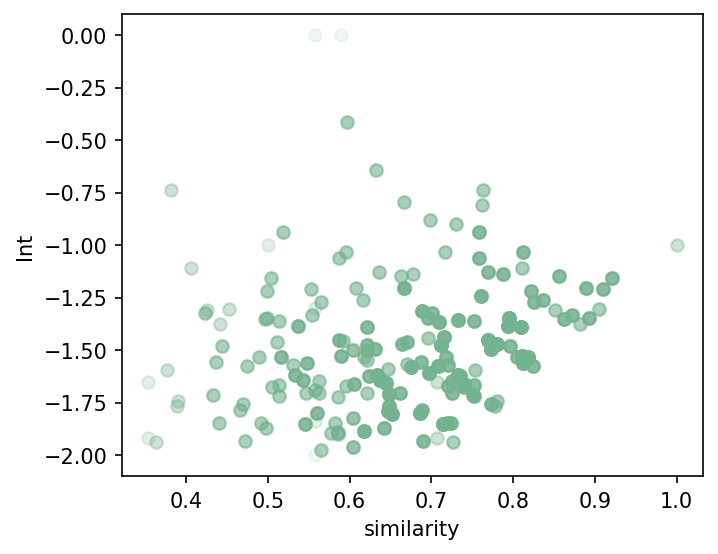

In [22]:
colors = ["#BB4F4F", '#2A69B3', '#74B38F', '#9B76B2', "#B99523", "#27B5AF", "#1E90FF", "#87CEEB"]
plt.figure(figsize=(5,4),dpi=150)
plt.scatter(dis_ls, syn_ls, alpha=0.1, color=colors[0])
plt.xlabel('similarity')
plt.ylabel('Syn')
plt.figure(figsize=(5,4),dpi=150)
plt.scatter(dis_ls, exp_ls, alpha=0.1, color=colors[1])
plt.xlabel('similarity')
plt.ylabel('Exp')
plt.figure(figsize=(5,4),dpi=150)
plt.scatter(dis_ls, int_ls, alpha=0.1, color=colors[2])
plt.xlabel('similarity')
plt.ylabel('Int')

Text(0, 0.5, 'det')

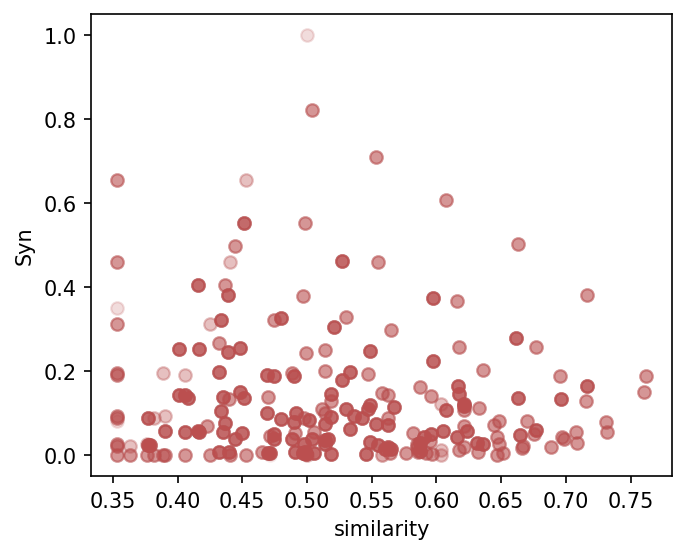

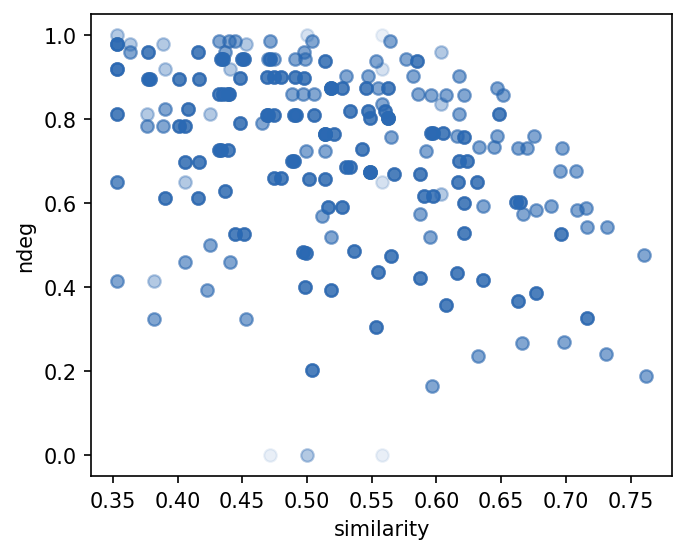

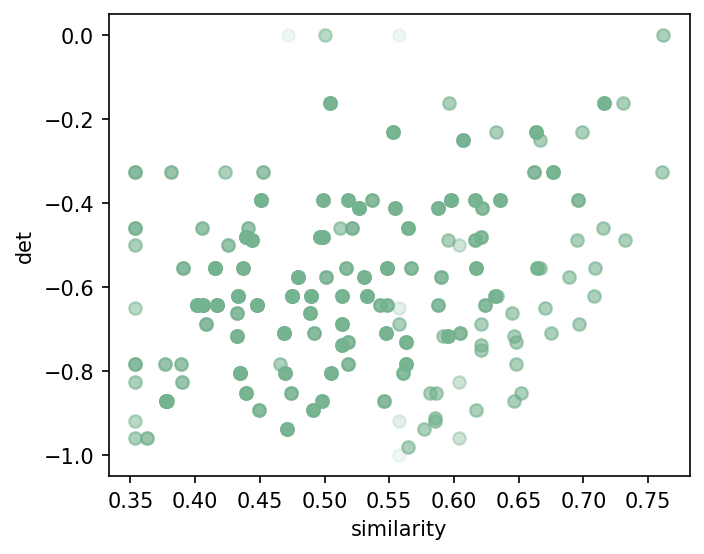

In [18]:
colors = ["#BB4F4F", '#2A69B3', '#74B38F', '#9B76B2', "#B99523", "#27B5AF", "#1E90FF", "#87CEEB"]
plt.figure(figsize=(5,4),dpi=150)
plt.scatter(dis_ls, syn_ls, alpha=0.1, color=colors[0])
plt.xlabel('similarity')
plt.ylabel('Syn')
plt.figure(figsize=(5,4),dpi=150)
plt.scatter(dis_ls, syn_ndeg_ls, alpha=0.1, color=colors[1])
plt.xlabel('similarity')
plt.ylabel('ndeg')
plt.figure(figsize=(5,4),dpi=150)
plt.scatter(dis_ls, syn_det_ls, alpha=0.1, color=colors[2])
plt.xlabel('similarity')
plt.ylabel('det')